In [13]:
from pyforest import *

In [14]:
data=pd.read_csv("C:\\Users\\HP\\Documents\\DataScience\\Capstone\\CAPSTONE PROJECT 1\\Data\\Diabetes.csv")

In [15]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [1]:
data.shape

NameError: name 'data' is not defined

In [16]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [19]:
data.replace('?',np.NAN,inplace=True)
#replacing tha '?' with null.

In [20]:
data.isnull().sum()[data.isnull().sum()>0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

In [21]:
med=['glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [22]:
for i in med:
    print(i,'\n')
    print(data[i].value_counts())

glimepiride 

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
acetohexamide 

No        101765
Steady         1
Name: acetohexamide, dtype: int64
glipizide 

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
glyburide 

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64
tolbutamide 

No        101743
Steady        23
Name: tolbutamide, dtype: int64
pioglitazone 

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64
rosiglitazone 

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64
acarbose 

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64
miglitol 

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64
troglitazone 

No        101763
Steady         3
Name: troglitazone, dty

Creating a column which contains two classes:

Insulin 
    
Combination of drugs
    

In [23]:
data['Medication'] = np.where((data['insulin']=='No') 
                              &( (data['metformin']!='No') | (data['repaglinide']!='No') |
                              (data['nateglinide']!='No')|(data['chlorpropamide']!='No')|(data['glimepiride']!='No')|
                              (data['acetohexamide']!='No')|(data['glipizide']!='No')|(data['glyburide']!='No')|
                              (data['tolbutamide']!='No')| (data['pioglitazone']!='No')| (data['rosiglitazone']!='No')|
                            (data['acarbose']!='No')|(data['miglitol']!='No')|(data['troglitazone']!='No')|
                            (data['tolazamide']!='No')|(data['examide']!='No')|(data['citoglipton']!='No')|(data['glyburide-metformin']!='No')|
                            (data['glipizide-metformin']!='No')|(data['glimepiride-pioglitazone']!='No')|(data['metformin-rosiglitazone']!='No')|
                            (data['metformin-pioglitazone']!='No')),'Combination', 'Insulin')

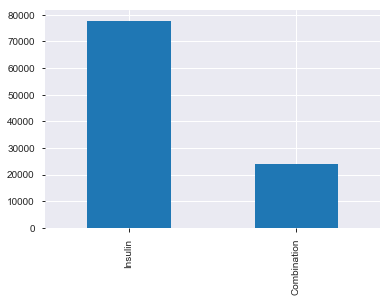

In [24]:
data['Medication'].value_counts().plot(kind='bar')

In [25]:
print('Treatment with Insulin:', round(data['Medication'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Treatment with combination of drugs:', round(data['Medication'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Treatment with Insulin: 76.44 % of the dataset
Treatment with combination of drugs: 23.56 % of the dataset


The data is imbalanced. 

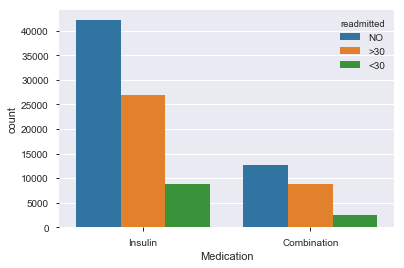

In [26]:
sns.countplot(data['Medication'],hue=data['readmitted'])

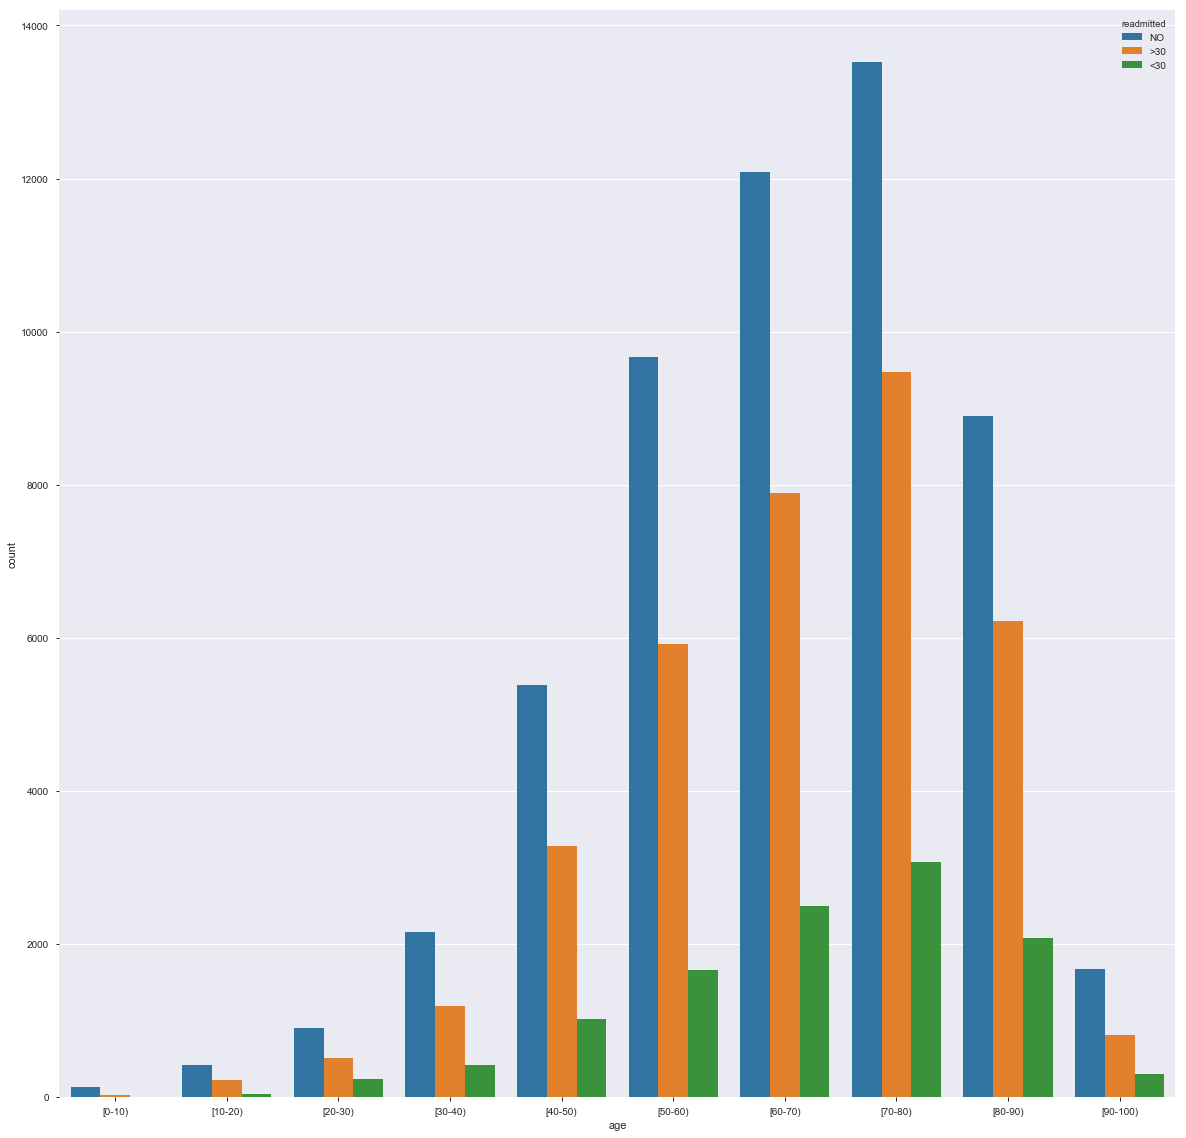

In [27]:
plt.figure(figsize=(20,20))
sns.countplot(data['age'],hue=data['readmitted'])


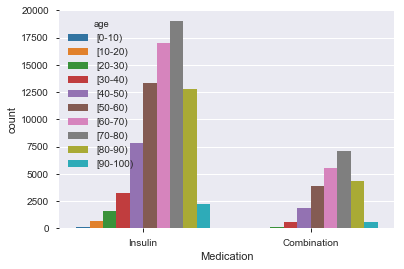

In [28]:
sns.countplot(data['Medication'],hue=data['age'])

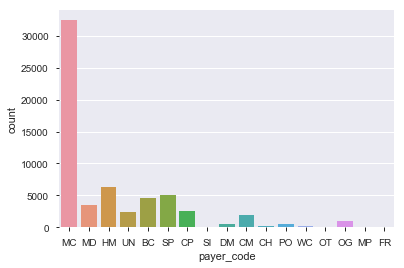

In [29]:
sns.countplot(data['payer_code'])
plt.show()

In [30]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Medication'],
      dtype='object')

In [31]:
diabetes=data.drop([ 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

In [32]:
a=diabetes['readmitted'][diabetes['Medication']=='Combination'].value_counts()
b=diabetes['readmitted'][diabetes['Medication']=='Insulin'].value_counts()
print("Readmission with combination of drugs:",a)
print("Readmission with solo Insulin treatment:",b)

Readmission with combination of drugs: NO     12748
>30     8722
<30     2510
Name: readmitted, dtype: int64
Readmission with solo Insulin treatment: NO     42116
>30    26823
<30     8847
Name: readmitted, dtype: int64


In [33]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'change', 'diabetesMed', 'readmitted', 'Medication'],
      dtype='object')

In [34]:

diabetes['age']=diabetes['age'].replace('[0-10)',5)
diabetes['age']=diabetes['age'].replace('[10-20)',15)
diabetes['age']=diabetes['age'].replace('[20-30)',25)
diabetes['age']=diabetes['age'].replace('[30-40)',35)
diabetes['age']=diabetes['age'].replace('[40-50)',45)
diabetes['age']=diabetes['age'].replace('[50-60)',55)
diabetes['age']=diabetes['age'].replace('[60-70)',65)
diabetes['age']=diabetes['age'].replace('[70-80)',75)
diabetes['age']=diabetes['age'].replace('[80-90)',85)
diabetes['age']=diabetes['age'].replace('[90-100)',95)
diabetes['age'].value_counts()

75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

1. Weight is missing in over 98% records. Owing to the poor interpretability of missing values and little predictive generalizability to other patients, best thing is to just drop it.
2. Payer code and Medical Specialty of treating physician also have 40–50% missing values. We decided to drop these

In [35]:
diabetes.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [36]:
drop_Idx =set(diabetes[(diabetes['diag_1'] == '?') & (diabetes['diag_2'] == '?') & (diabetes['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(diabetes['gender'][data['gender'] == 'Unknown/Invalid'].index))
drop_Idx = drop_Idx.union(set(diabetes[diabetes['discharge_disposition_id'] == 11].index))

In [37]:
drop_Idx = drop_Idx.union(set(diabetes[diabetes['discharge_disposition_id'] == 19].index))

In [38]:
drop_Idx = drop_Idx.union(set(diabetes[diabetes['discharge_disposition_id'] == 20].index))

In [39]:
drop_Idx = drop_Idx.union(set(diabetes[diabetes['discharge_disposition_id'] == 21].index))

In [40]:
diabetes['service_utilization'] = diabetes['number_outpatient'] + diabetes['number_emergency'] + diabetes['number_inpatient']

In [41]:
diabetes['gender'] = diabetes['gender'].replace('Male', 1)
diabetes['gender'] = diabetes['gender'].replace('Female', 0)

In [42]:
diabetes['change'] = diabetes['change'].replace('Ch', 1)
diabetes['change'] = diabetes['change'].replace('No', 0)

In [43]:
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace('Yes', 1)
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace('No', 0)

In [44]:
diabetes['Medication'] = diabetes['Medication'].replace('Insulin', 1)
diabetes['Medication'] = diabetes['Medication'].replace('Combination', 0)

In [207]:
df = diabetes.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df.shape

(71518, 26)

In [208]:
df.isnull().sum()[df.isnull().sum()>0]

race      1948
diag_1      11
diag_2     294
diag_3    1225
dtype: int64

In [209]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
df['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Hispanic            1517
Other               1178
Asian                497
Name: race, dtype: int64

In [210]:
df['race'].mode()

0    Caucasian
dtype: object

In [211]:
df['race'].fillna(value='Caucasian',inplace=True)

In [212]:
# import warnings
# warnings.filterwarnings('ignore')
# df['race'] = df['race'].replace('AfricanAmerican', 0)
# df['race'] = df['race'].replace('Asian', 1)
# df['race'] = df['race'].replace('Caucasian', 2)
# df['race'] = df['race'].replace('Hispanic', 3)
# df['race'] = df['race'].replace('Other', 4)

In [213]:
# df['age'].median()

In [214]:
df['diag_1'].fillna(method='ffill',inplace=True)
df['diag_2'].fillna(method='bfill',inplace=True)
df['diag_3'].fillna(method='bfill',inplace=True)

In [215]:
df['diag_3']=[x.strip('V') for x in df['diag_3']]
df['diag_3']=[x.strip('E') for x in df['diag_3']]
df['diag_1']=[x.strip('V') for x in df['diag_1']]
df['diag_1']=[x.strip('E') for x in df['diag_1']]
df['diag_2']=[x.strip('V') for x in df['diag_2']]
df['diag_2']=[x.strip('E') for x in df['diag_2']]


In [216]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

# Removing the outliers from the data.

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 26 columns):
encounter_id                71518 non-null int64
patient_nbr                 71518 non-null int64
race                        71518 non-null object
gender                      71518 non-null object
age                         71518 non-null int64
admission_type_id           71518 non-null int64
discharge_disposition_id    71518 non-null int64
admission_source_id         71518 non-null int64
time_in_hospital            71518 non-null int64
num_lab_procedures          71518 non-null int64
num_procedures              71518 non-null int64
num_medications             71518 non-null int64
number_outpatient           71518 non-null int64
number_emergency            71518 non-null int64
number_inpatient            71518 non-null int64
diag_1                      71518 non-null object
diag_2                      71518 non-null object
diag_3                      71518 non-null object
num

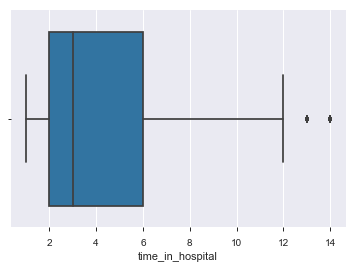

In [218]:
sns.boxplot(df['time_in_hospital'])

In [219]:
q1=np.quantile(df['time_in_hospital'],q=0.25)
q3=np.quantile(df['time_in_hospital'],q=0.75)
iqr=q3-q1
x=iqr*1.5
ll=q1-x
ul=q3+x
print(ll)
print(ul)

-4.0
12.0


In [220]:
cleandf=df[(~(df['time_in_hospital']>ul) | (df['time_in_hospital']<ll))]   

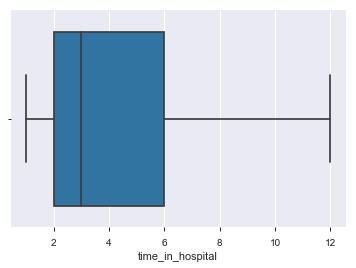

In [221]:
sns.boxplot(cleandf['time_in_hospital'])

Now that the data is clean and the null values are handled, let us look at the important features and build a base model with said features.

In [222]:
dummydf=pd.get_dummies(df)

In [223]:
#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score
from sklearn.model_selection import train_test_split

In [228]:
dummydf.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,readmitted_<30,readmitted_>30,readmitted_NO
0,2278392,8222157,5,6,25,1,1,41,0,1,...,0,1,0,0,0,1,0,0,0,1
1,149190,55629189,15,1,1,7,3,59,0,18,...,0,1,0,0,0,1,0,0,1,0
2,64410,86047875,25,1,1,7,2,11,5,13,...,0,1,0,0,0,1,0,0,0,1
3,500364,82442376,35,1,1,7,2,44,1,16,...,0,1,0,0,0,1,0,0,0,1
4,16680,42519267,45,1,1,7,1,51,0,8,...,0,1,0,0,0,1,0,0,0,1


In [229]:
xrf=dummydf.drop(['Medication','encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
yrf=dummydf['Medication']
X_train, X_test, y_train, y_test = train_test_split(xrf, yrf, test_size=0.20,random_state=673845)

In [230]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [231]:
features=pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=["Features_wt"]).head(10)

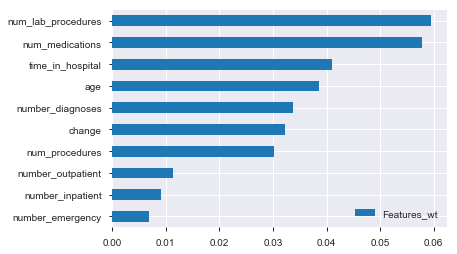

In [232]:
features.sort_values(by="Features_wt",ascending=True).plot(kind="barh")

In [206]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,Medication,service_utilization
0,2278392,8222157,2,0,5,6,25,1,1,41,...,250.01,255,1,None,None,0,0,NO,1,0
1,149190,55629189,2,0,15,1,1,7,3,59,...,250.01,255,9,None,None,1,1,>30,1,0
2,64410,86047875,0,0,25,1,1,7,2,11,...,250,27,6,None,None,0,1,NO,0,3
3,500364,82442376,2,1,35,1,1,7,2,44,...,250.43,403,7,None,None,1,1,NO,1,0
4,16680,42519267,2,1,45,1,1,7,1,51,...,157,250,5,None,None,1,1,NO,1,0


In [233]:
# ximp=dummydf[['num_lab_procedures','num_medications','time_in_hospital','age','number_diagnoses','change','num_procedures','number_outpatient','number_inpatient','number_emergency']]
# yimp=dummydf['Medication']

In [258]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics

In [248]:
# Xftrain, Xftest, yftrain, yftest = train_test_split(ximp,yimp, test_size=0.20,random_state=673845)

Applying model on all the features.


In [249]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
model_score = model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict_test))
print(metrics.classification_report(y_test, y_predict_test))

0.7970497762863534
[[1640 1887]
 [1016 9761]]
              precision    recall  f1-score   support

           0       0.62      0.46      0.53      3527
           1       0.84      0.91      0.87     10777

    accuracy                           0.80     14304
   macro avg       0.73      0.69      0.70     14304
weighted avg       0.78      0.80      0.79     14304



In [250]:
print("The Accuracy is{}" .format(accuracy_score(y_test,y_predict_test)))
print("Classification report is{}".format(classification_report(y_test,y_predict_test)))
print("The Kappa Score is {}".format(cohen_kappa_score(y_test,y_predict_test)))


The Accuracy is0.7970497762863534
Classification report is              precision    recall  f1-score   support

           0       0.62      0.46      0.53      3527
           1       0.84      0.91      0.87     10777

    accuracy                           0.80     14304
   macro avg       0.73      0.69      0.70     14304
weighted avg       0.78      0.80      0.79     14304

The Kappa Score is 0.40429248425047015


In [238]:
from imblearn.over_sampling import SMOTE

In [239]:
smote=SMOTE(ratio="minority")

In [244]:
xtrain_reset,ytrain_reset=smote.fit_sample(X_train,y_train)

In [245]:
xtest_reset,ytest_reset=smote.fit_sample(X_test,y_test)

In [246]:
pred=rf.fit(xtrain_reset,ytrain_reset).predict(xtest_reset)

In [247]:
print("The Accuracy is{}" .format(accuracy_score(ytest_reset,pred)))
print("Classification report is{}".format(classification_report(ytest_reset,pred)))
print("The Kappa Score is {}".format(cohen_kappa_score(ytest_reset,pred)))

The Accuracy is0.8252296557483529
Classification report is              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10777
           1       0.84      0.80      0.82     10777

    accuracy                           0.83     21554
   macro avg       0.83      0.83      0.83     21554
weighted avg       0.83      0.83      0.83     21554

The Kappa Score is 0.6504593114967059


In [256]:
from sklearn.metrics import recall_score,precision_score,f1_score
rf=RandomForestClassifier(n_estimators=9)
rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))
print('Recall score:',recall_score(y_test,rf.predict(X_test)))
print('F1 score:',f1_score(y_test,rf.predict(X_test)))
print('Precision Score',precision_score(y_test,rf.predict(X_test)))

Train score: 0.9886915789841647
Test score: 0.7679670022371364
Recall score: 0.918159042405122
F1 score: 0.8563763036046561
Precision Score 0.8023840415180019


Random forest is giving us a highly overfit model.

In [253]:
from sklearn.ensemble import BaggingClassifier

In [254]:
bgc = BaggingClassifier()
bgc = bgc.fit(X_train, y_train)

In [257]:
print('Train score:',bgc.score(X_train,y_train))
print('Test score:',bgc.score(X_test,y_test))
print('Recall score:',recall_score(y_test,bgc.predict(X_test)))
print('F1 score:',f1_score(y_test,bgc.predict(X_test)))
print('Precision Score',precision_score(y_test,bgc.predict(X_test)))

Train score: 0.9895305344845667
Test score: 0.7730005592841164
Recall score: 0.8660109492437599
F1 score: 0.8518231186966643
Precision Score 0.8380926724137931


Grid Search CV for KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
neighbors = np.arange(1,3)
# create and fit a ridge regression model, testing each alpha
model = KNeighborsClassifier()
grid = GridSearchCV(cv=3,estimator=model, param_grid=dict(n_neighbors=neighbors))
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)